# SOHO

(summary from chatgpt)

The SOHO (Solar and Heliospheric Observatory) spacecraft's SEM (Solar Extreme Ultraviolet Monitor) instrument is designed to monitor and measure solar extreme ultraviolet (EUV) radiation. The SEM provides valuable data for understanding the Sun’s influence on the Earth's upper atmosphere and space weather. The SEM instrument has different channels, each tailored to specific wavelengths and uses.

SOHO SEM Channels and Their Uses:
## 0.1–50 nm Channel (Total EUV flux):
Purpose: This channel measures the total EUV flux in a broad range, which includes significant EUV and soft X-ray radiation from the Sun.

Usefulness: Data from this channel are critical for understanding the total EUV energy input to the Earth's atmosphere, which affects the ionosphere and thermosphere. This can impact radio communications, satellite orbits, and GPS accuracy.

## 26–34 nm Channel (He II 30.4 nm):
Purpose: This channel is focused on detecting solar emissions primarily around the 30.4 nm line, which corresponds to singly ionized helium (He II).

Usefulness: The 30.4 nm line is important for studying the solar corona and chromosphere, as it provides information about the behavior of the Sun’s upper atmosphere. This line is also significant for understanding ionospheric photoionization processes and monitoring space weather impacts on Earth.

## 1–50 nm Channel (broad soft X-ray and EUV):
Purpose: This channel captures a wide range of EUV and soft X-ray radiation.

Usefulness: Measurements in this range provide insights into solar flares and active regions on the Sun. Solar flares emit high amounts of energy in the EUV and X-ray spectrum, which can cause sudden increases in ionization in the Earth's atmosphere, leading to radio blackouts and other disturbances.

## Applications of SOHO SEM Data:
Space Weather Monitoring: Data from SEM channels help predict and monitor space weather conditions, which can impact satellite operations, astronaut safety, and power grids on Earth.

Solar Physics Research: SEM data contribute to understanding the mechanisms of solar activity, including solar flares and coronal mass ejections (CMEs).

Atmospheric Science: The instrument's measurements of solar EUV radiation help model how the Earth's upper atmosphere responds to solar variability, affecting the density and composition of the ionosphere and thermosphere.
Overall, the SOHO SEM instrument provides vital information for scientists studying the Sun's influence on the Earth and its surrounding space environment.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seppy
from seppy.loader.soho import soho_load

In [ ]:
# change time resolution to get smoother curve
averaging = '60min' 
df_ave = df.resample(averaging).mean()

NameError: name 'df' is not defined

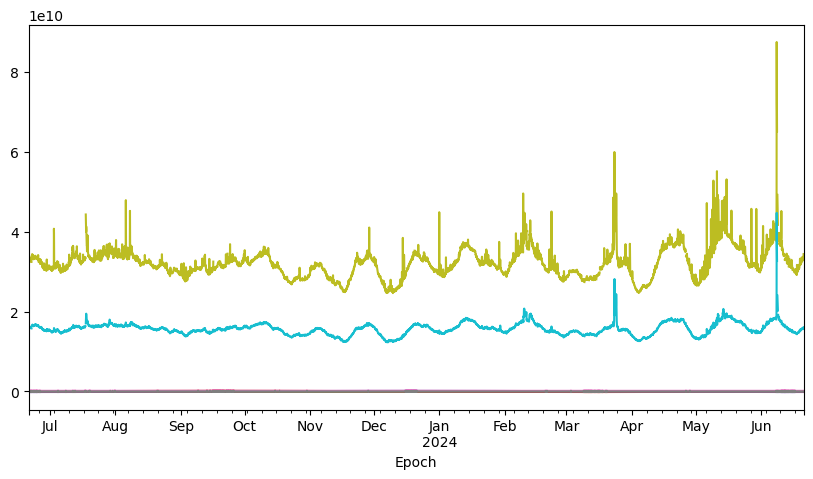

In [4]:
plt.figure(figsize=(10, 5))  # 10 inches wide, 6 inches tall
for name in df_ave.columns:
    df_ave[name].plot()

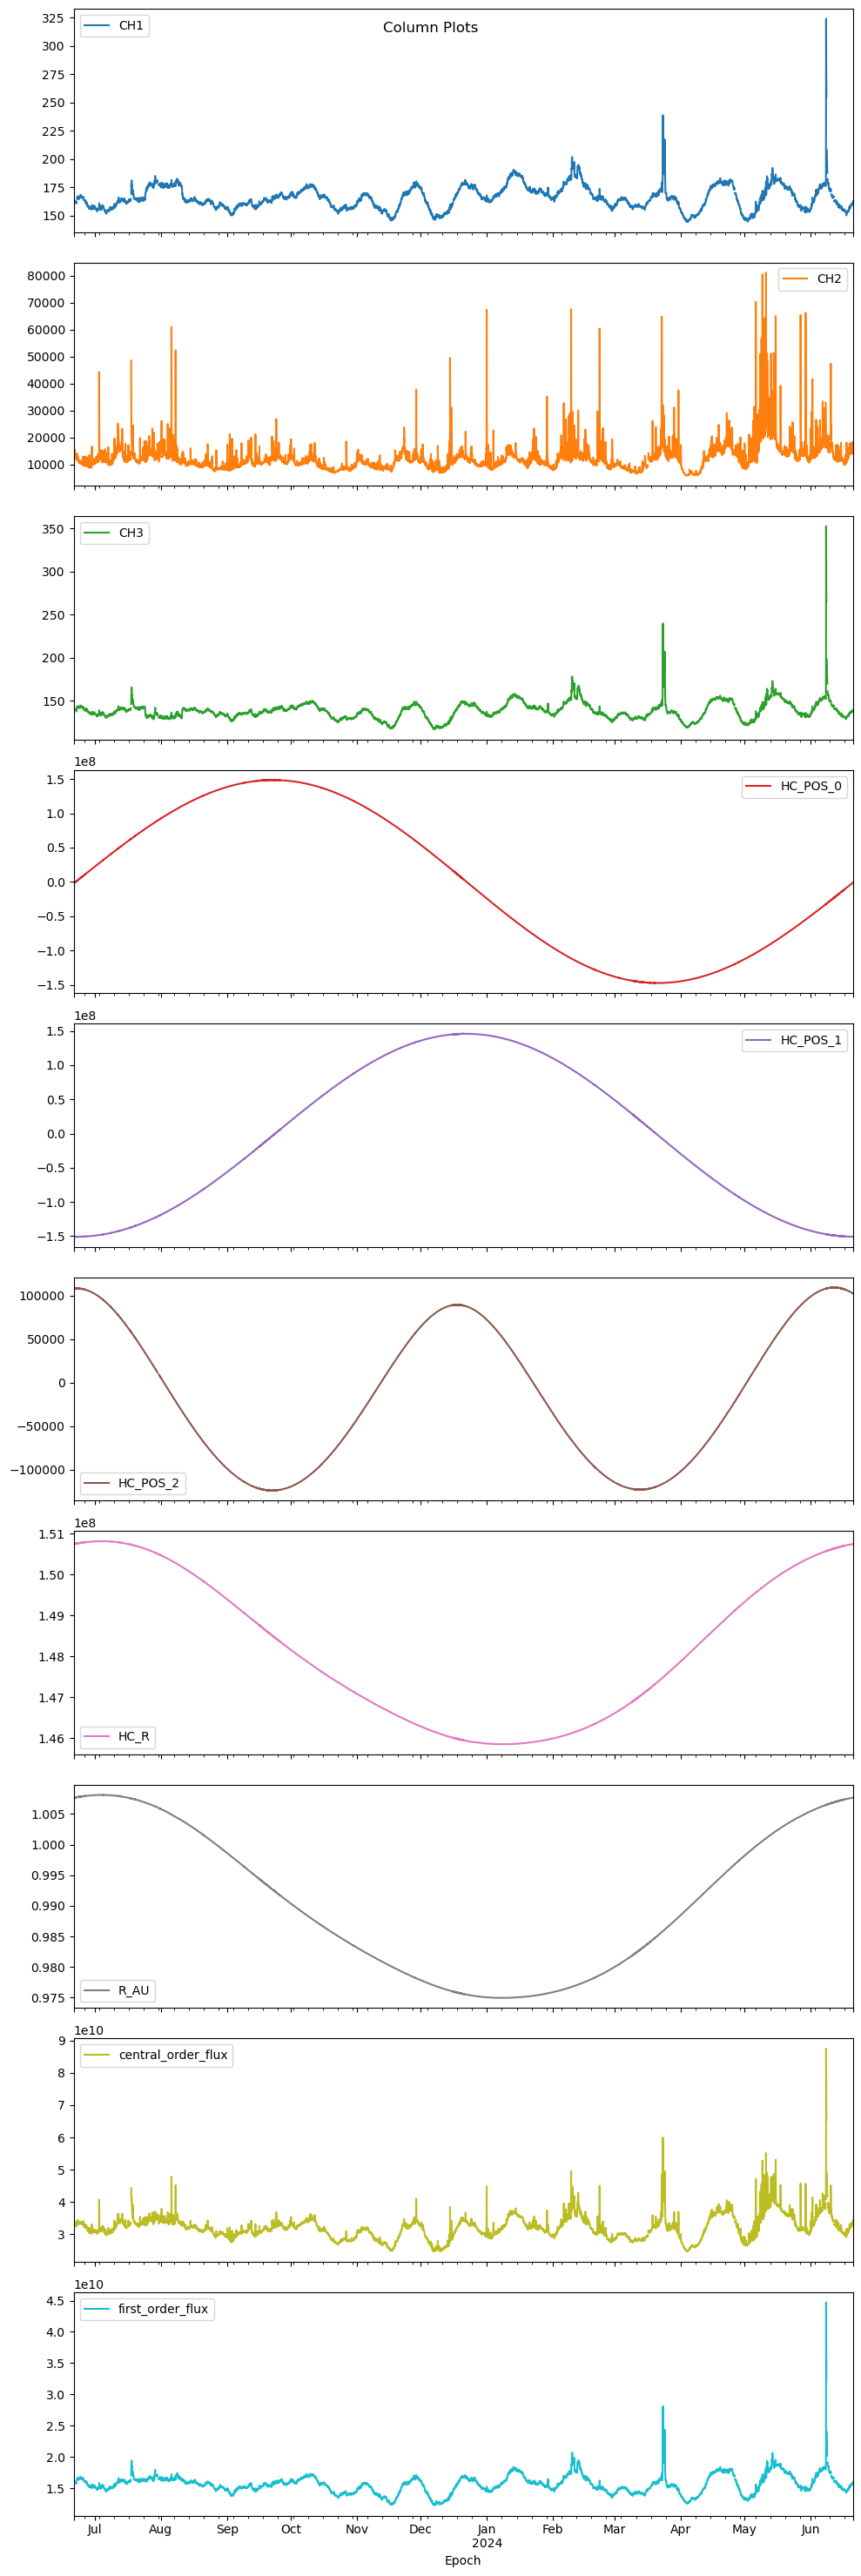

In [5]:
df_ave.plot(subplots=True, layout=(len(df.columns), 1), figsize=(10, len(df.columns) * 3), title="Column Plots")
plt.tight_layout()  # Adjust layout to avoid overlap

In [6]:
fpath = '..data/soho/'
for name in df.columns:
    tem = df_ave[name]
    fout = fpath + '/soho_'+ name + '.csv'
    tem.to_csv(fout)

In [16]:
# test out cdf read

In [106]:
import cdflib.xarray

fname = 'C:/Users/clwhit13/sunpy/data/soho_celias-sem_15s_20230623_v04.cdf'
ds = cdflib.xarray.cdf_to_xarray(fname, fillval_to_nan=True)
ds = ds.rename({'Epoch':'time'})
ds

<xarray.Dataset> Size: 139kB
Dimensions:             (time: 2896, dim0: 3)
Coordinates:
  * time                (time) datetime64[ns] 23kB 2023-06-23T03:12:39.024000...
Dimensions without coordinates: dim0
Data variables:
    CH1                 (time) float32 12kB 166.4 166.4 166.4 ... 166.9 166.9
    CH2                 (time) float32 12kB 1.198e+04 1.198e+04 ... 1.048e+04
    CH3                 (time) float32 12kB 143.5 143.5 143.5 ... 144.0 144.0
    first_order_flux    (time) float32 12kB 1.663e+10 1.663e+10 ... 1.672e+10
    central_order_flux  (time) float32 12kB 3.385e+10 3.385e+10 ... 3.361e+10
    HC_POS              (time, dim0) float32 35kB 2.937e+06 ... 1.08e+05
    label_HC_POS        (dim0) <U1 12B 'X' 'Y' 'Z'
    HC_R                (time) float32 12kB 1.508e+08 1.508e+08 ... 1.508e+08
    R_AU                (time) float32 12kB 1.008 1.008 1.008 ... 1.008 1.008
Attributes: (12/22)
    Project:                     ['ISTP>International Solar-Terrestrial Physi...
    Source_name:                 ['SOHO>Solar Heliospheric Observatory']
    Discipline:                  ['Solar Physics>Ultraviolet Observations']
    Data_type:                   ['15S>15 second resolution']
    Descriptor:                  ['CELIAS-SEM>Solar Extreme-Ultra-Violet Moni...
    Data_version:                ['4']
    ...                          ...
    Instrument_type:             ['Plasma and Solar Wind']
    LINK_TEXT:                   ['SOHO CELIAS-SEM 15 second data available at']
    LINK_TITLE:                  ['the SOHO Archive']
    HTTP_LINK:                   ['https://soho.nascom.nasa.gov/data/archive....
    Parents:                     ['23_06_23_v4.00']
    Generated_by:                ['Andriy Koval at SPDF from original ASCII f...

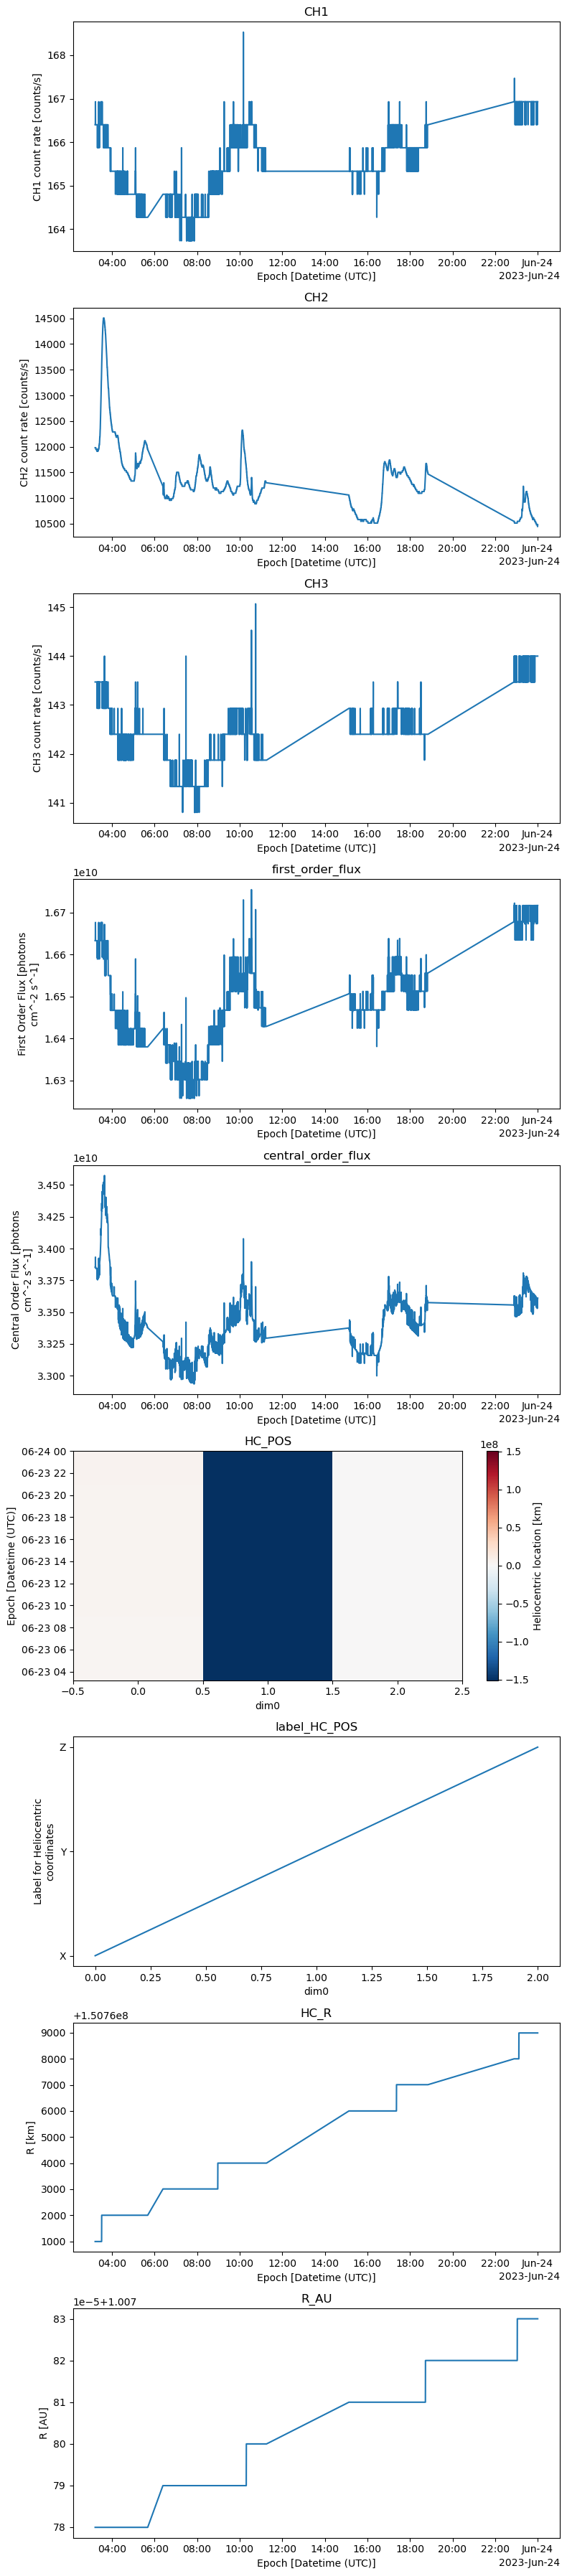

In [119]:
num_vars = len(ds.data_vars)
# Set up subplots
fig, axes = plt.subplots(num_vars, 1, figsize=(8, num_vars * 4), squeeze=False)
# Loop over each variable and plot in its own subplot
for i, (var_name, var_data) in enumerate(ds.data_vars.items()):
    var_data.plot(ax=axes[i, 0])  # Plot on the correct subplot axis
    axes[i, 0].set_title(var_name)  # Title for each subplot
# Adjust layout
plt.tight_layout()

In [114]:
len(ds.variables)

10